<a href="https://colab.research.google.com/github/jschw/keras_timeseries_classification/blob/master/Curve_Dataset_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports

import numpy as np
import random
import matplotlib.pyplot as plt
#plt.rcParams['figure.dpi'] = 300
import math
import pandas as pd

In [ ]:
# Functions

def rotateCoordinates(x_data, y_data, rot_angle):
    x_ = x_data*math.cos(rot_angle) - y_data*math.sin(rot_angle)
    y_ = x_data*math.sin(rot_angle) + y_data*math.cos(rot_angle)
    return x_,y_

def get_n_sample_points(x_data, y_data, n):
    indexes = np.round(np.linspace(0,99, n)).astype('int')
    return x_data[indexes], y_data[indexes]

def get_random_index(array_size):
        index = np.random.choice(array_size, 1)
        return index[0]
    
def build_dataset(x_,y_, shape):
        data = []
        row = {}
        for i in range(len(x_)):
            row['x' + str(i+1)] = x_[i]
            row['y' + str(i+1)] = y_[i]
        row['shape'] = shape  
        data.append(row)  
        return data

def createParabola2(centre, rotation, a=2.0, b=2.0, c=2.0):
    x = np.linspace(0, 7, 100)
    #a = 2.0
    #b = 2.0
    #c = 2.0

    y_parabola = a * x**2 + b * x + c
    x_parabola = 2*x

    if rotation is not None:
        x_parabola, y_parabola = rotateCoordinates(x_parabola, y_parabola, rotation) 
    
    x_parabola = x_parabola + centre[0]
    y_parabola = y_parabola + centre[1]

    return x_parabola, y_parabola

def createCircle2(radius, centre, rotation):
    theta = np.linspace(0, math.pi/2.0,100)

    x_circle = radius * np.cos(theta) + centre[0]
    y_circle = radius * np.sin(theta) + centre[1]

    # Rotate
    if rotation is not None:
        x_circle, y_circle = rotateCoordinates(x_circle, y_circle, rotation) 

    return x_circle, y_circle

def createLine(a, b, centre, rotation):
    x = np.linspace(-5, 5, 100)
    #a = 2.0
    #b = 2.0

    y_line = a * x + b
    x_line = x

    if rotation is not None:
        x_line, y_line = rotateCoordinates(x_line, y_line, rotation) 
    
    x_line = x_line + centre[0]
    y_line = y_line + centre[1]

    return x_line, y_line

# Test the generator functions

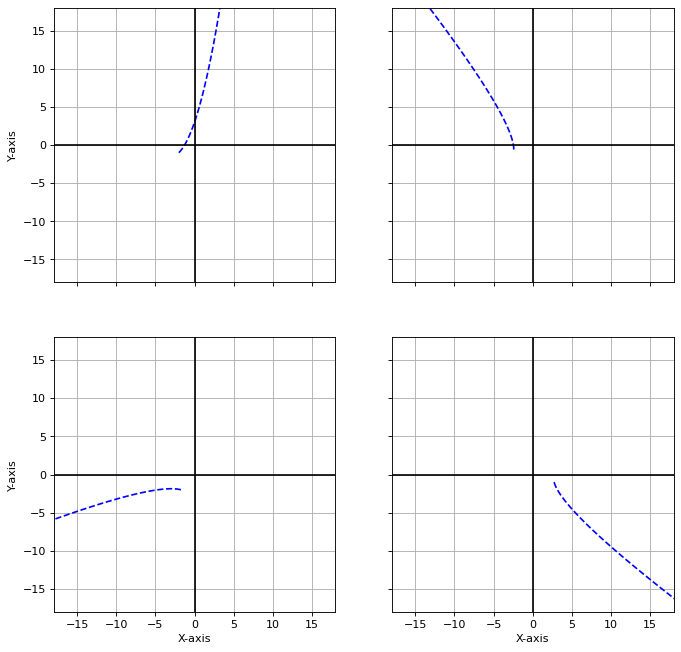

In [ ]:
# Parabola

fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.dpi = 80



angle = [0, math.pi/4, math.pi*2/3, math.pi*4/3]
j=0
fig_row = 0
fig_col = 0
for i in angle:
    j=j+1

    x_parabola, y_parabola = createParabola2(centre=[-3+j,-4+j], rotation=i)

    axs[fig_row, fig_col].plot(x_parabola, y_parabola, 'b--')

    fig_col += 1

    if fig_col == 2:
      fig_col = 0
      fig_row += 1


for ax in axs.flat:
    ax.set(xlabel='X-axis', ylabel='Y-axis', xlim=(-18,18), ylim=(-18,18))
    ax.label_outer()
    ax.grid(True)
    ax.axhline(y=0, color ="k")
    ax.axvline(x=0, color ="k")

plt.show()

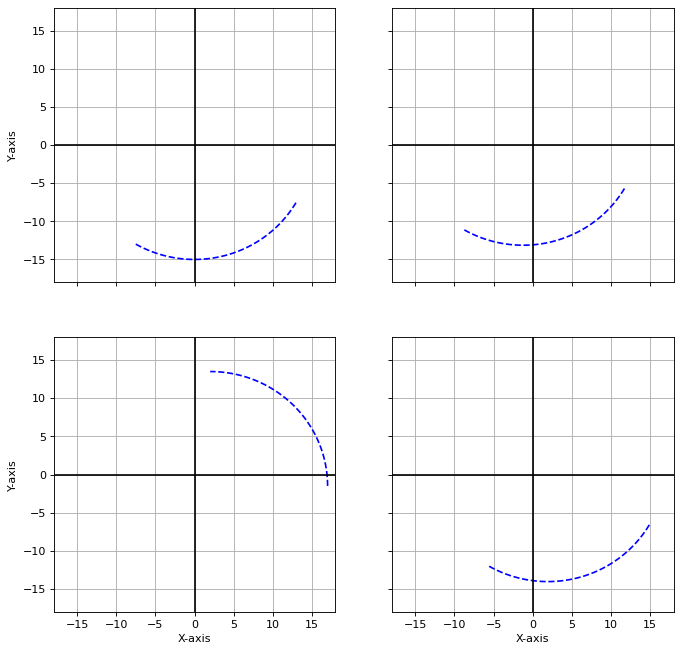

In [ ]:
# Circle

fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.dpi = 80

centre = [[0,0],[-1,-2],[2,-1.5],[-1.8,1.2]]
angle = [0, math.pi/4, math.pi*2/3, math.pi*4/3]

fig_row = 0
fig_col = 0
for i in centre:
    rotation = angle[get_random_index(len(angle))]

    x_circle, y_circle = createCircle2(radius=15, centre=i, rotation=rotation)

    axs[fig_row, fig_col].plot(x_circle, y_circle, 'b--')

    fig_col += 1

    if fig_col == 2:
      fig_col = 0
      fig_row += 1


for ax in axs.flat:
    ax.set(xlabel='X-axis', ylabel='Y-axis', xlim=(-18,18), ylim=(-18,18))
    ax.label_outer()
    ax.grid(True)
    ax.axhline(y=0, color ="k")
    ax.axvline(x=0, color ="k")

plt.show()

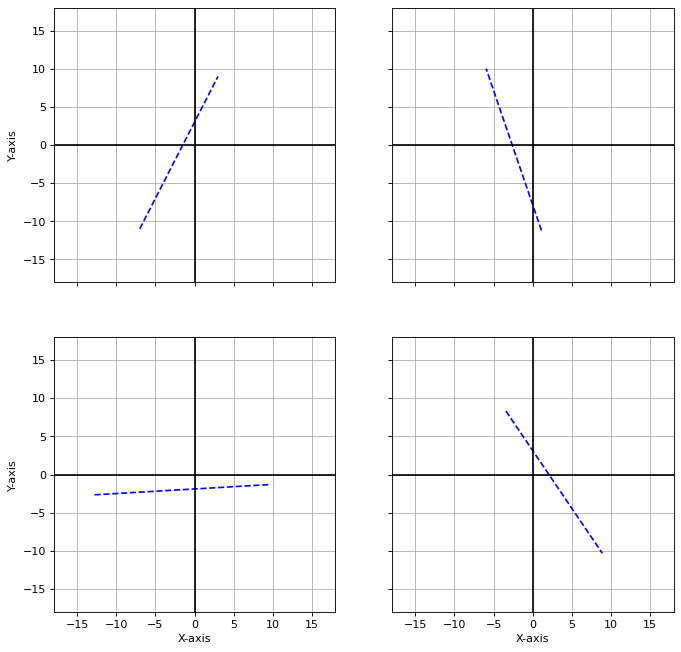

In [ ]:
# Line

fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.dpi = 80

centre = [[0,0],[-1,-2],[2,-1.5],[-1.8,1.2]]
angle = [0, math.pi/4, math.pi*2/3, math.pi*4/3]

fig_row = 0
fig_col = 0

angle = [0, math.pi/4, math.pi*2/3, math.pi*4/3]
j=0
fig_row = 0
fig_col = 0

for i in angle:
    j=j+1

    x_line, y_line = createLine(2.0, 2.0, centre=[-3+j,-4+j], rotation=i)

    axs[fig_row, fig_col].plot(x_line, y_line, 'b--')

    fig_col += 1

    if fig_col == 2:
      fig_col = 0
      fig_row += 1


for ax in axs.flat:
    ax.set(xlabel='X-axis', ylabel='Y-axis', xlim=(-18,18), ylim=(-18,18))
    ax.label_outer()
    ax.grid(True)
    ax.axhline(y=0, color ="k")
    ax.axvline(x=0, color ="k")

plt.show()

# Test sampling

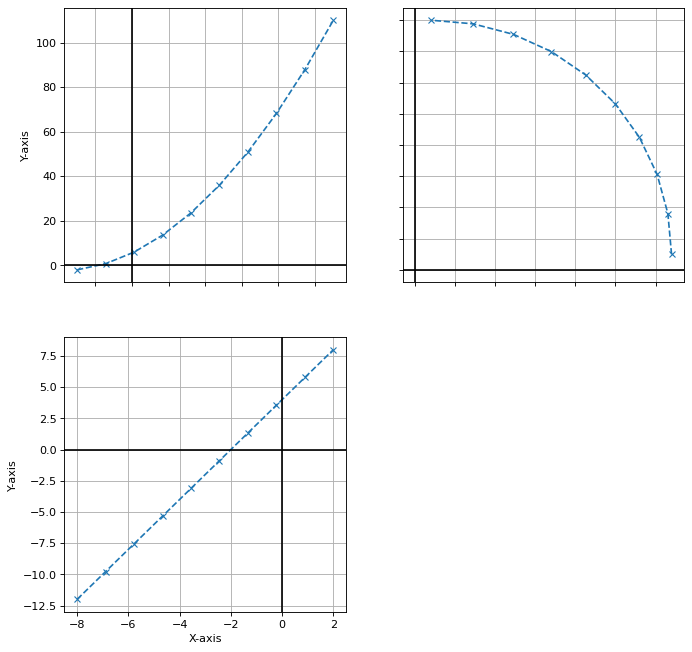

In [ ]:
sample_count = 10

fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.dpi = 80

centre = [[0,0],[-1,-2],[2,-1.5],[-1.8,1.2]]
angle = [0, math.pi/4, math.pi*2/3, math.pi*4/3]


# Draw parabola

x,y = createParabola2(centre= [-3,-4],rotation= 0)
x_samplepoints, y_samplepoints = get_n_sample_points(x,y, sample_count)
#print(x_samplepoints)
#print(y_samplepoints)
axs[0, 0].plot(x_samplepoints, y_samplepoints, '--x')

# Draw circle

x,y = createCircle2(radius = 15, centre= [1,1], rotation=0)
x_samplepoints, y_samplepoints = get_n_sample_points(x,y, sample_count)
#print(x_samplepoints)
#print(y_samplepoints)
axs[0, 1].plot(x_samplepoints, y_samplepoints, '--x')

# Draw line
x,y = createLine(a=2.0, b=2.0, centre= [-3,-4],rotation= 0)
x_samplepoints, y_samplepoints = get_n_sample_points(x,y, sample_count)
#print(x_samplepoints)
#print(y_samplepoints)
axs[1, 0].plot(x_samplepoints, y_samplepoints, '--x')

# Hide lower right plot
axs[1,1].set_visible(False)


for ax in axs.flat:
    ax.set(xlabel='X-axis', ylabel='Y-axis',)
    ax.label_outer()
    ax.grid(True)
    ax.axhline(y=0, color ="k")
    ax.axvline(x=0, color ="k")

plt.show()

# Build train and test dataset

In [ ]:
# Datasets size in samples per curve type
size_train = 1000
size_test = 10

# Parabola

centre_x_arr = np.linspace(-12, 12, 100)
centre_y_arr = np.linspace(-12, 12, 100)
a_array = np.linspace(-5, 5, 100)
b_array = np.linspace(-5, 5, 100)
c_array = np.linspace(-5, 5, 100)
rotation_array = np.linspace(2*math.pi, 100)

parabola_dataset_train = pd.DataFrame()
parabola_dataset_test = pd.DataFrame()

for i in range(size_train):

    centre_x = centre_x_arr[get_random_index(len(centre_x_arr))]
    centre_y = centre_y_arr[get_random_index(len(centre_y_arr))]
    rotation = rotation_array[get_random_index(len(rotation_array))]
    a_tmp = a_array[get_random_index(len(a_array))]
    b_tmp = b_array[get_random_index(len(b_array))]
    c_tmp = c_array[get_random_index(len(c_array))]

    x,y = createParabola2(centre= [centre_x, centre_y],rotation= rotation, a=a_tmp, b=b_tmp, c=c_tmp)
    
    x_, y_ = get_n_sample_points(x, y, sample_count)

    data = build_dataset(x_, y_, 'parabola')

    parabola_dataset_train = parabola_dataset_train.append(data, ignore_index=True)

for i in range(size_test):

    centre_x = centre_x_arr[get_random_index(len(centre_x_arr))]
    centre_y = centre_y_arr[get_random_index(len(centre_y_arr))]
    rotation = rotation_array[get_random_index(len(rotation_array))]
    a_tmp = a_array[get_random_index(len(a_array))]
    b_tmp = b_array[get_random_index(len(b_array))]
    c_tmp = c_array[get_random_index(len(c_array))]

    x,y = createParabola2(centre= [centre_x, centre_y],rotation= rotation, a=a_tmp, b=b_tmp, c=c_tmp)
    
    x_, y_ = get_n_sample_points(x, y, sample_count)

    data = build_dataset(x_, y_, 'parabola')

    parabola_dataset_test = parabola_dataset_test.append(data, ignore_index=True)

#print(parabola_dataset.head())
#print(parabola_dataset.count())


# Circle

radius_array = np.linspace(1,20,100)
centre_x_arr = np.linspace(-12, 12, 100)
centre_y_arr = np.linspace(-12, 12, 100)
rotation_array = np.linspace(2*math.pi, 100)

circle_dataset_train = pd.DataFrame()
circle_dataset_test = pd.DataFrame()

for i in range(size_train):
    radius = radius_array[get_random_index(len(radius_array))]
    centre_x = centre_x_arr[get_random_index(len(centre_x_arr))]
    centre_y = centre_y_arr[get_random_index(len(centre_y_arr))]
    rotation = rotation_array[get_random_index(len(rotation_array))]

    x,y = createCircle2(radius = radius, centre= [centre_x,centre_y], rotation=rotation)

    x_,y_ = get_n_sample_points(x, y, sample_count)

    data = build_dataset(x_, y_, 'circle')

    circle_dataset_train = circle_dataset_train.append(data, ignore_index=True)   


for i in range(size_test):
    radius = radius_array[get_random_index(len(radius_array))]
    centre_x = centre_x_arr[get_random_index(len(centre_x_arr))]
    centre_y = centre_y_arr[get_random_index(len(centre_y_arr))]
    rotation = rotation_array[get_random_index(len(rotation_array))]

    x,y = createCircle2(radius = radius, centre= [centre_x,centre_y], rotation=rotation)

    x_,y_ = get_n_sample_points(x, y, sample_count)

    data = build_dataset(x_, y_, 'circle')

    circle_dataset_test = circle_dataset_test.append(data, ignore_index=True)  

#print(circle_dataset.head())
#print(circle_dataset.count())


# Line

a_array = np.linspace(-5.0, 5.0,100)
b_array = np.linspace(-5.0, 5.0,100)
centre_x_arr = np.linspace(-12, 12, 100)
centre_y_arr = np.linspace(-12, 12, 100)
rotation_array = np.linspace(2*math.pi, 100)

line_dataset_train = pd.DataFrame()
line_dataset_test = pd.DataFrame()

for i in range(size_train):
    a = a_array[get_random_index(len(a_array))]
    b = b_array[get_random_index(len(b_array))]
    centre_x = centre_x_arr[get_random_index(len(centre_x_arr))]
    centre_y = centre_y_arr[get_random_index(len(centre_y_arr))]
    rotation = rotation_array[get_random_index(len(rotation_array))]

    x,y = createLine(a=a, b=b, centre= [centre_x,centre_y], rotation=rotation)

    x_,y_ = get_n_sample_points(x, y, sample_count)

    data = build_dataset(x_, y_, 'line')

    line_dataset_train = line_dataset_train.append(data, ignore_index=True)   

for i in range(size_test):
    a = a_array[get_random_index(len(a_array))]
    b = b_array[get_random_index(len(b_array))]
    centre_x = centre_x_arr[get_random_index(len(centre_x_arr))]
    centre_y = centre_y_arr[get_random_index(len(centre_y_arr))]
    rotation = rotation_array[get_random_index(len(rotation_array))]

    x,y = createLine(a=a, b=b, centre= [centre_x,centre_y], rotation=rotation)

    x_,y_ = get_n_sample_points(x, y, sample_count)

    data = build_dataset(x_, y_, 'line')

    line_dataset_test = line_dataset_test.append(data, ignore_index=True)  

#print(line_dataset.head())
#print(line_dataset.count())


In [ ]:
# Combine and save train dataset
combined_dataset_train = pd.concat([parabola_dataset_train, circle_dataset_train, line_dataset_train])
print(combined_dataset_train.head(10))

combined_dataset_train.to_csv('curve_dataset_train.csv', index=False)

          x1         y1         x2  ...         x10         y10     shape
0   9.565615   9.198434  10.853958  ...   44.552404   41.131421  parabola
1  -2.323850   8.766944  -6.476666  ... -153.986884 -157.819867  parabola
2   8.400214 -10.532788   6.344488  ...   42.210515  -72.616390  parabola
3 -13.298162   6.088077 -15.429489  ... -153.208582    1.230659  parabola
4   0.129549 -13.501880  -0.512097  ...  -89.469456  -60.925393  parabola
5  11.286962  16.047034   9.721636  ...  -31.071919  -48.184120  parabola
6  -5.587757  -7.154818  -5.663967  ... -133.559204  -80.972850  parabola
7  -6.124241  -0.230678  -8.412078  ...  -53.166937  224.414886  parabola
8   0.583530   1.271687  -3.605905  ... -138.675402  -33.410707  parabola
9 -15.130612  -8.391372 -21.049939  ... -285.487150  -16.000459  parabola

[10 rows x 21 columns]


In [ ]:
# Combine and save test dataset
combined_dataset_test = pd.concat([parabola_dataset_test, circle_dataset_test, line_dataset_test])
print(combined_dataset_test.head(10))

combined_dataset_test.to_csv('curve_dataset_test.csv', index=False)

          x1         y1         x2  ...         x10         y10     shape
0  -8.751103  -0.964561 -11.233224  ... -151.266023  147.127327  parabola
1  -0.632858   4.873505  -1.424605  ...   10.721977 -178.440830  parabola
2  13.701996  -2.937322  13.417528  ...  -44.717788   20.879535  parabola
3   3.826838  -9.579058   2.649083  ...  -12.974210   -6.156370  parabola
4   1.465090  -5.283693  -3.190834  ... -205.664949 -130.859089  parabola
5   2.657044   3.107077   0.375437  ...  -64.829820  121.731031  parabola
6  -8.650030  -2.482774  -5.794193  ...   58.737848   16.461723  parabola
7  -0.174413  14.954012  -2.152506  ... -135.018862 -130.679003  parabola
8   3.153529   8.343253   1.768457  ...  112.649576   63.089089  parabola
9  -4.943496  -9.532580  -1.865616  ...  106.064698  146.414404  parabola

[10 rows x 21 columns]
